<a href="https://colab.research.google.com/github/kelvinfoo123/MH3511-Data-Analysis-with-R/blob/main/MH3511_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

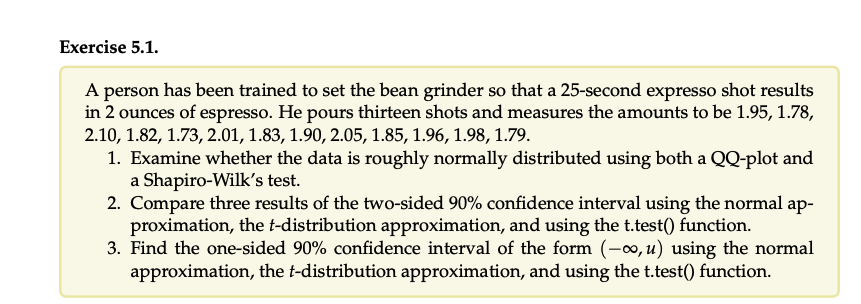

**Question 1**


	Shapiro-Wilk normality test

data:  coffee
W = 0.96491, p-value = 0.8271


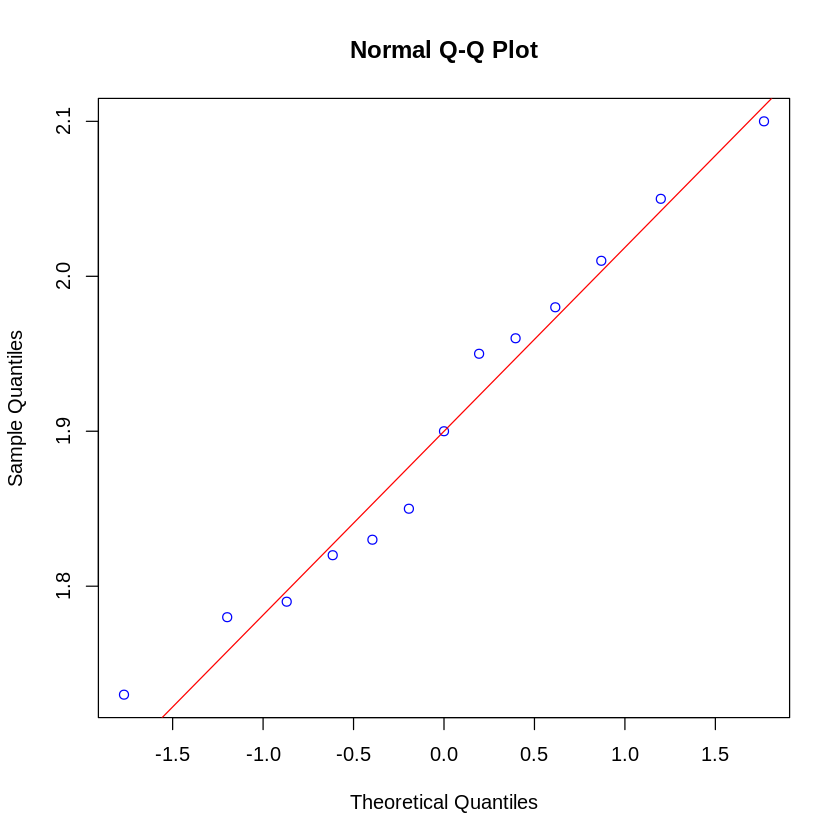

In [1]:
coffee = c(1.95, 1.78, 2.1, 1.82, 1.73, 2.01, 1.83, 1.9, 2.05, 1.85, 1.96, 1.98, 1.79)

qqnorm(coffee, col = 'blue')
qqline(coffee, col = 'red')

shapiro.test(coffee)

- From the qqplot, the data are normally distributed. 
- From Shapiro test, we cannot reject the hypothesis that the samples are normally distributed.

**Question 2**

In [2]:
xbar = mean(coffee)
s = sd(coffee)
n = length(coffee)
alpha = 0.1 #100(1 - alpha) = 90 

In [3]:
# Normal distribution 
xbar - qnorm(1 - alpha/2) * s/sqrt(n)
xbar + qnorm(1 - alpha/2) * s/sqrt(n)

[1] 1.851813

[1] 1.955879

In [4]:
# t distribution 
xbar - qt(1 - alpha/2, n-1) * s/sqrt(n)
xbar + qt(1 - alpha/2, n-1) * s/sqrt(n)

[1] 1.847466

[1] 1.960226

In [5]:
#t test
t.test(coffee, conf.level = 0.9)


	One Sample t-test

data:  coffee
t = 60.184, df = 12, p-value = 2.928e-16
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 1.847466 1.960226
sample estimates:
mean of x 
 1.903846 


**Question 3**

In [7]:
# Normal distribution 
xbar + qnorm(1 - alpha) * s/sqrt(n)

[1] 1.944386

In [8]:
# t distribution 
xbar + qt(1 - alpha, n - 1) * s/sqrt(n)

[1] 1.946748

In [9]:
t.test(coffee, conf.level = 0.9, alt = 'less')


	One Sample t-test

data:  coffee
t = 60.184, df = 12, p-value = 1
alternative hypothesis: true mean is less than 0
90 percent confidence interval:
     -Inf 1.946748
sample estimates:
mean of x 
 1.903846 


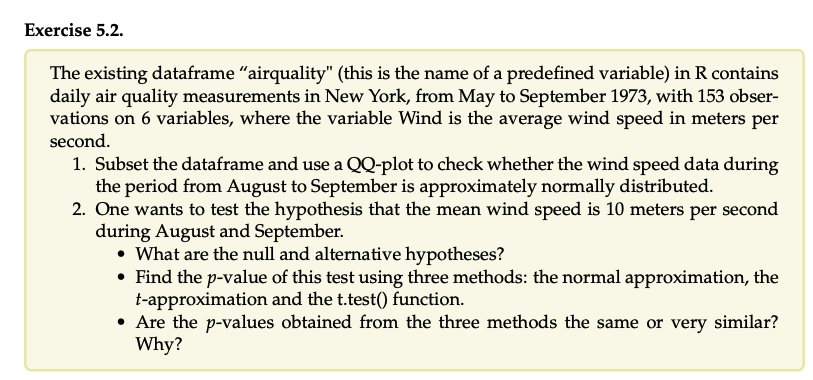

**Question 1**

In [10]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [11]:
subsets = subset(airquality, (Month == 8 | Month == 9))
str(subsets)

'data.frame':	61 obs. of  6 variables:
 $ Ozone  : int  39 9 16 78 35 66 122 89 110 NA ...
 $ Solar.R: int  83 24 77 NA NA NA 255 229 207 222 ...
 $ Wind   : num  6.9 13.8 7.4 6.9 7.4 4.6 4 10.3 8 8.6 ...
 $ Temp   : int  81 81 82 86 85 87 89 90 90 92 ...
 $ Month  : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


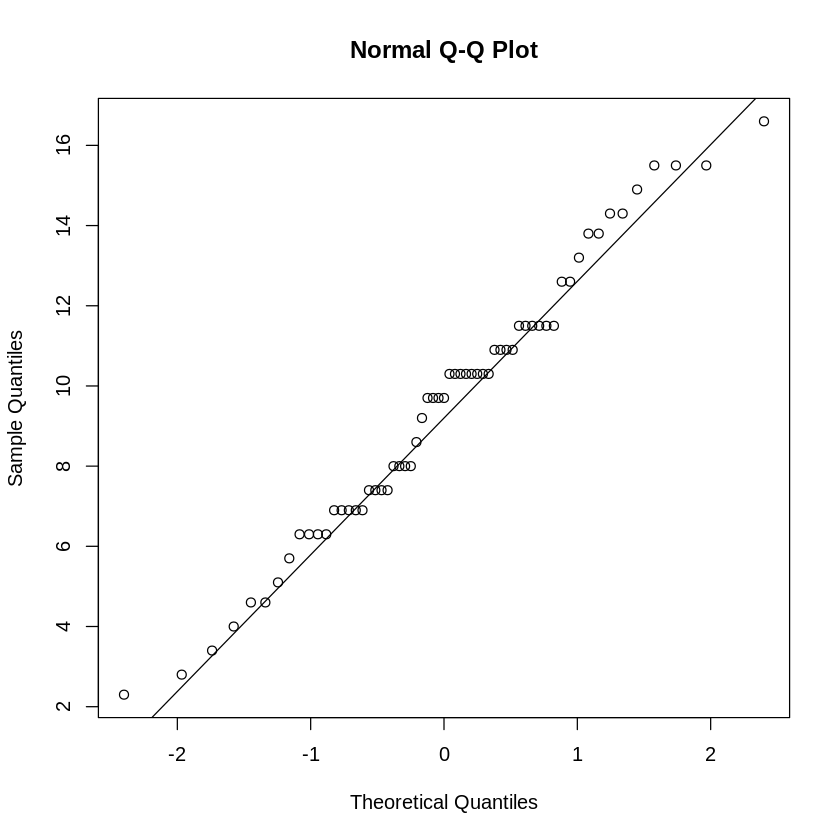

In [12]:
qqnorm(subsets$Wind)
qqline(subsets$Wind)

- The data is rather normally distributed. 

**Question 2**

- Null hypothesis: $$mu = 10$$
- Alternative hypothesis: $$mu \neq 10$$

To compute the p-value given $H_1$, we want $$P(|T| > |t| | H_0)$$

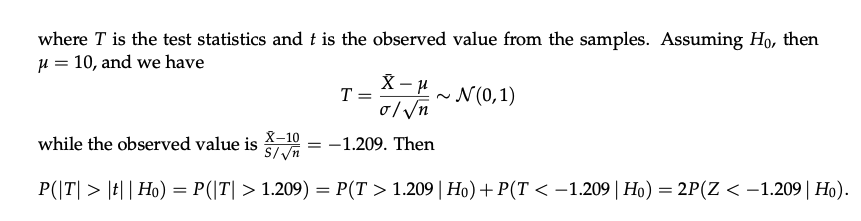


In [13]:
# Normal distribution
xbar = mean(subsets$Wind)
s = sd(subsets$Wind)
n = length(subsets$Wind)

t = (xbar - 10)/s * sqrt(n)
p_val = 2 * pnorm(t)
p_val

[1] 0.2266138

In [14]:
# t distribution 
p_val = 2 * pt(t, df = n - 1)
p_val

[1] 0.2313569

In [15]:
# t test 
t.test(subsets$Wind, mu = 10)


	One Sample t-test

data:  subsets$Wind
t = -1.2091, df = 60, p-value = 0.2314
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
  8.607564 10.343256
sample estimates:
mean of x 
  9.47541 


- We do not reject the null hypothesis that $\mu = 10$. 

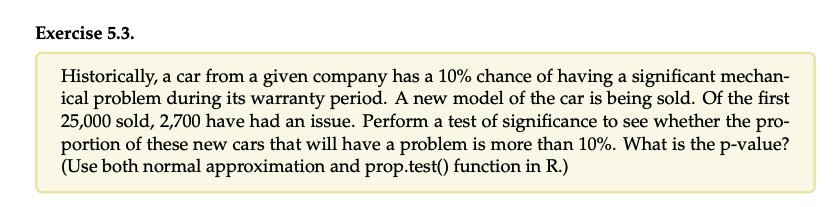

- Null hypothesis: $p = 0.1$
- Alternative hypothesis: $u > 0.1$

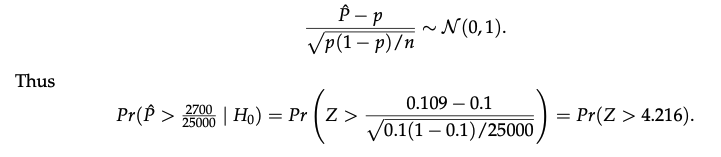

In [17]:
# Normal distribution 
phat = 2700/25000 
p_val = 1 - pnorm((phat - 0.1) / sqrt(0.1 * (1 - 0.1)/25000))
p_val

[1] 1.24133e-05

In [19]:
# Prop test 
prop.test(2700, 25000, p = 0.1, alt = 'greater')


	1-sample proportions test with continuity correction

data:  2700 out of 25000, null probability 0.1
X-squared = 17.689, df = 1, p-value = 1.301e-05
alternative hypothesis: true p is greater than 0.1
95 percent confidence interval:
 0.1047937 1.0000000
sample estimates:
    p 
0.108 


- We reject the null hypothesis and conclude that the proportion of new cars with problems will be greater than 10%. 

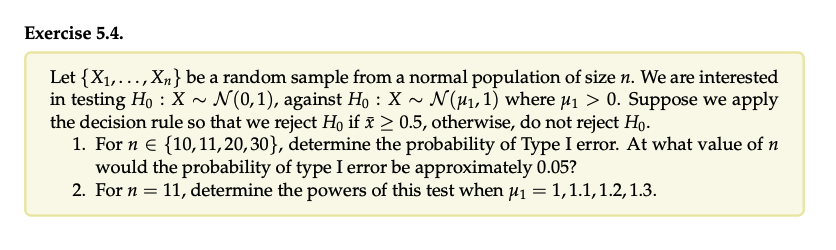

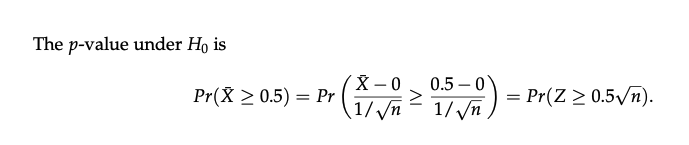

In [20]:
n = c(10, 11, 20, 30)
type_1_error = 1 - pnorm(0.5 * sqrt(n))
type_1_error

[1] 0.05692315 0.04862721 0.01267366 0.00308495

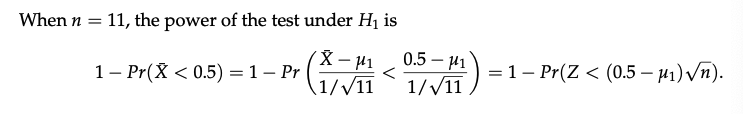

In [21]:
mu = c(1, 1.1, 1.2, 1.3)
n = 11
power = 1 - pnorm((0.5 - mu) * sqrt(n))
power

[1] 0.9513728 0.9767031 0.9898738 0.9960145